<a href="https://colab.research.google.com/github/nastikas/Deep-Learning-with-TensorFlow/blob/master/NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-09-03 17:50:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-09-03 17:50:12 (73.3 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [8]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 40)            13600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 40)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 3211)              131651    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              10313732  
Total params: 10,674,247
Trainable params: 10,674,247
Non-trainable params: 0
__________________________________________

In [9]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 13ms/step - loss: 6.9547 - accuracy: 0.0228
Epoch 2/100
484/484 [==============================] - 6s 13ms/step - loss: 6.5951 - accuracy: 0.0235
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 6.5782 - accuracy: 0.0225
Epoch 4/100
484/484 [==============================] - 6s 13ms/step - loss: 6.5724 - accuracy: 0.0238
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 6.5710 - accuracy: 0.0228
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.5692 - accuracy: 0.0232
Epoch 7/100
484/484 [==============================] - 6s 13ms/step - loss: 6.5690 - accuracy: 0.0221
Epoch 8/100
484/484 [==============================] - 6s 13ms/step - loss: 6.5697 - accuracy: 0.0204
Epoch 9/100
484/484 [==============================] - 6s 13ms/step - loss: 6.5695 - accuracy: 0.0220
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 6.569

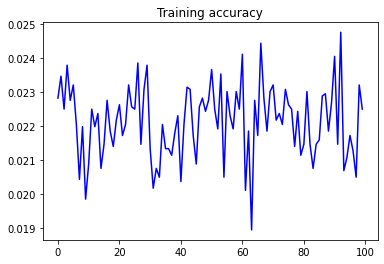

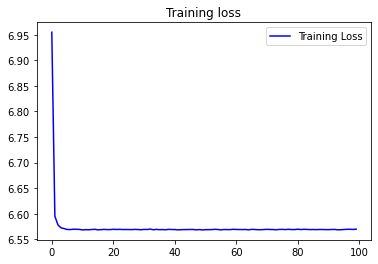

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [11]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my my


In [14]:
from tensorflow.keras import regularizers

In [18]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 10, 300)           301200    
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 200)               320800    
_________________________________________________________________
dense_8 (Dense)              (None, 1605)              322605    
_________________________________________________________________
dense_9 (Dense)              (None, 3211)              5156866   
Total params: 6,422,571
Trainable params: 6,422,571
Non-trainable params: 0
____________________________________________

In [19]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 7s 15ms/step - loss: 6.8982 - accuracy: 0.0226
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.5020 - accuracy: 0.0263
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.3801 - accuracy: 0.0274
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 6.3225 - accuracy: 0.0288
Epoch 5/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2659 - accuracy: 0.0316
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2293 - accuracy: 0.0296
Epoch 7/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2200 - accuracy: 0.0312
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 6.1802 - accuracy: 0.0338
Epoch 9/100
484/484 [==============================] - 7s 14ms/step - loss: 6.1546 - accuracy: 0.0334
Epoch 10/100
484/484 [==============================] - 7s 14ms/step - loss: 6.128

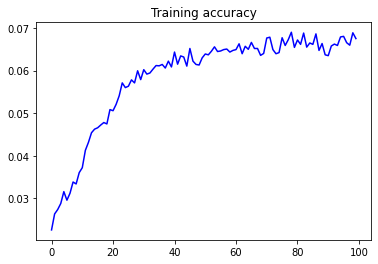

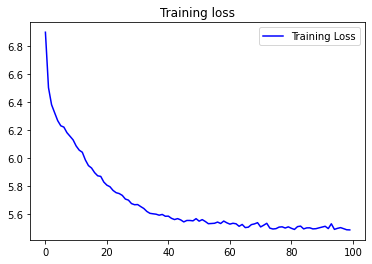

In [20]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [21]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and my love and
